In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_csv("AAPL.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
# Handle Missing Values
# Check missing values
print(df.isnull().sum())
# Fill missing values using forward fill
df = df.fillna(method='ffill')
# If still missing, backfill
df = df.fillna(method='bfill')


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
df.duplicated().sum()

0

In [5]:
# STEP 4: Feature Engineering

# Moving Averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Volatility (Rolling Std Dev)
df['Volatility_10'] = df['Close'].rolling(window=10).std()
df['Volatility_20'] = df['Close'].rolling(window=20).std()

# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Target Variable: Next 30-Day Close Price
df['Target_Close_30'] = df['Close'].shift(-30)

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Volatility_10,Volatility_20,Daily_Return,Target_Close_30
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,276.932996,271.181998,259.6744,5.130104,7.221150,0.016318,NaN
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,278.511993,272.076997,260.6424,4.646479,7.687566,0.000951,NaN
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,280.425995,273.357997,261.7342,5.029357,8.421259,0.019840,NaN
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,282.259995,274.455997,262.8428,4.731653,9.070523,-0.000379,NaN
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,283.896994,275.669496,263.9676,4.829246,9.660051,0.005935,NaN


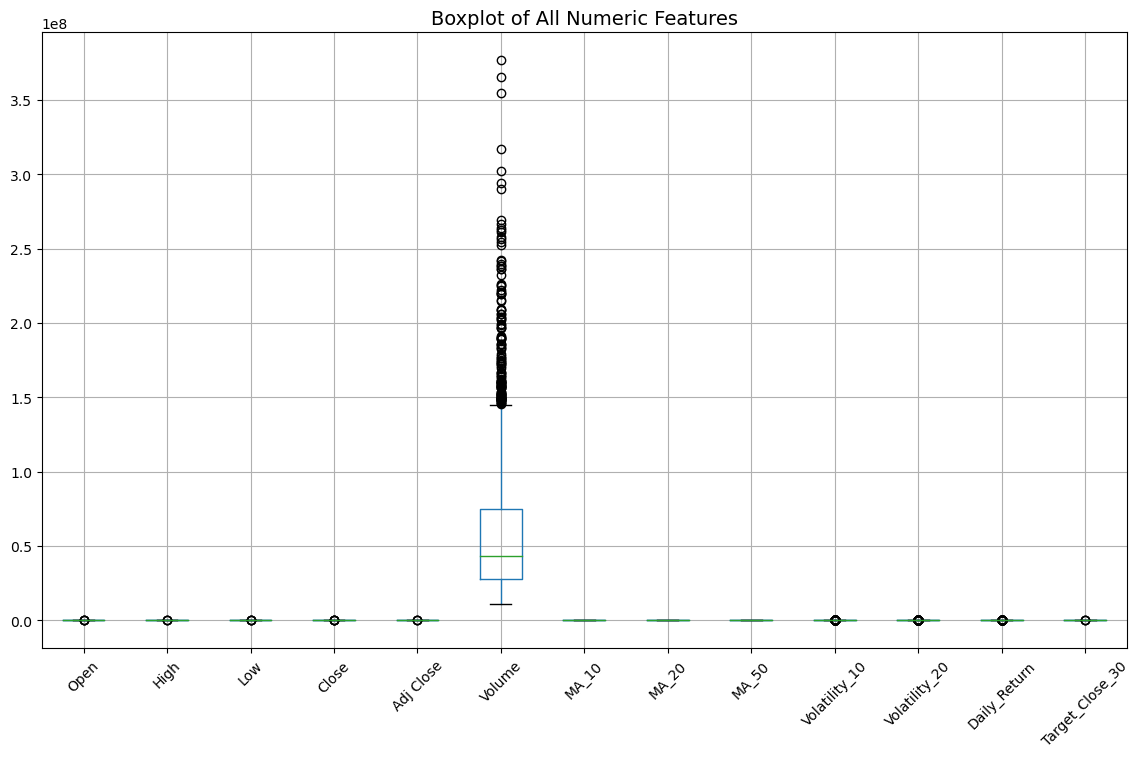

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(14, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [7]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

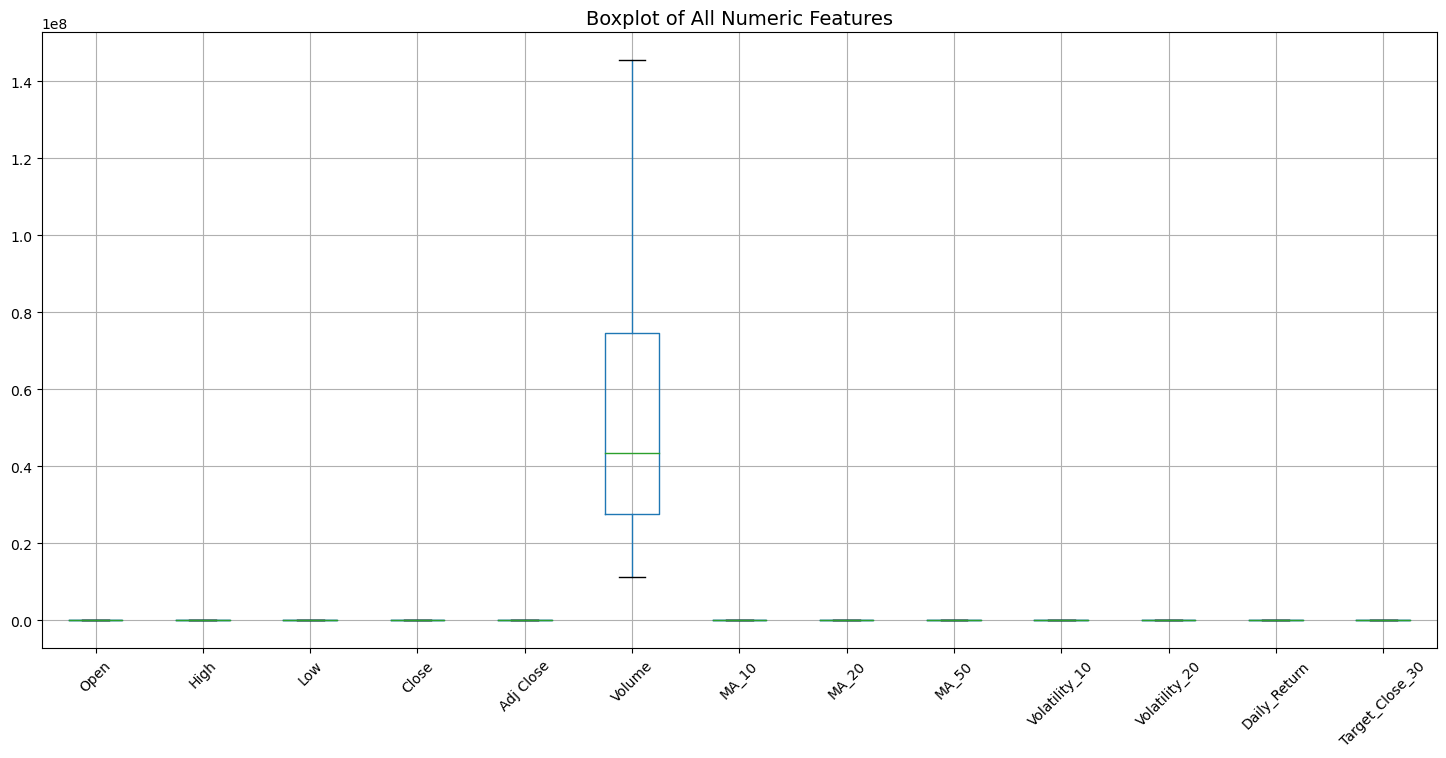

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(18, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Drop Rows With NaN Target
df = df.dropna()

df.shape


(1932, 14)

In [10]:
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()

# Identify numeric columns to scale, excluding 'Date'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Volatility_10,Volatility_20,Daily_Return,Target_Close_30
49,2012-03-14,0.130345,0.134144,0.131278,0.136265,0.111637,1.0,0.100074,0.086935,0.041988,0.450844,0.380889,1.000000,0.134970
50,2012-03-15,0.145130,0.137781,0.133451,0.133513,0.109315,1.0,0.102984,0.090200,0.044859,0.547196,0.408231,0.373980,0.132049
51,2012-03-16,0.134919,0.130349,0.133071,0.133520,0.109321,1.0,0.105844,0.093296,0.047692,0.609633,0.425658,0.478671,0.120228
52,2012-03-19,0.144280,0.138990,0.140694,0.144151,0.118291,1.0,0.110655,0.096973,0.050707,0.674014,0.458418,0.884601,0.119079
53,2012-03-20,0.145061,0.142517,0.142370,0.147478,0.121098,1.0,0.116015,0.100358,0.053729,0.685986,0.500886,0.602239,0.121471


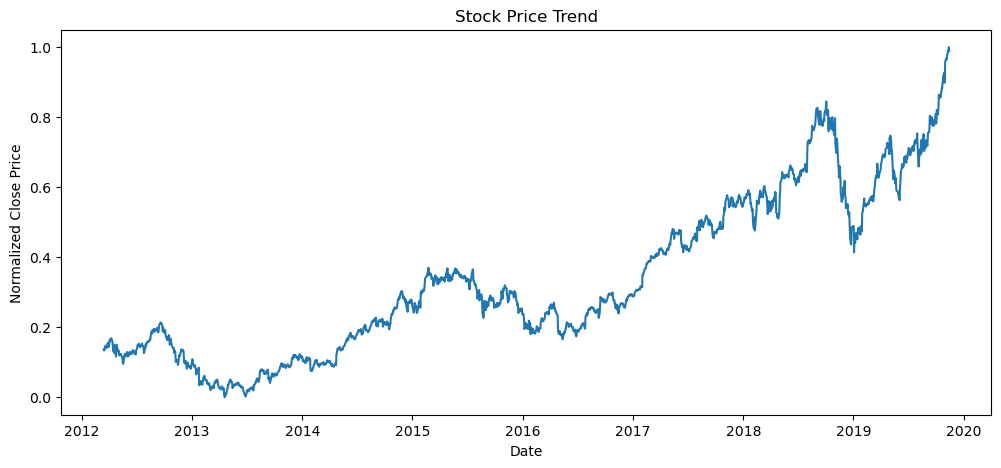

In [11]:
#EDA
# Plot Close Price Trend
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.show()


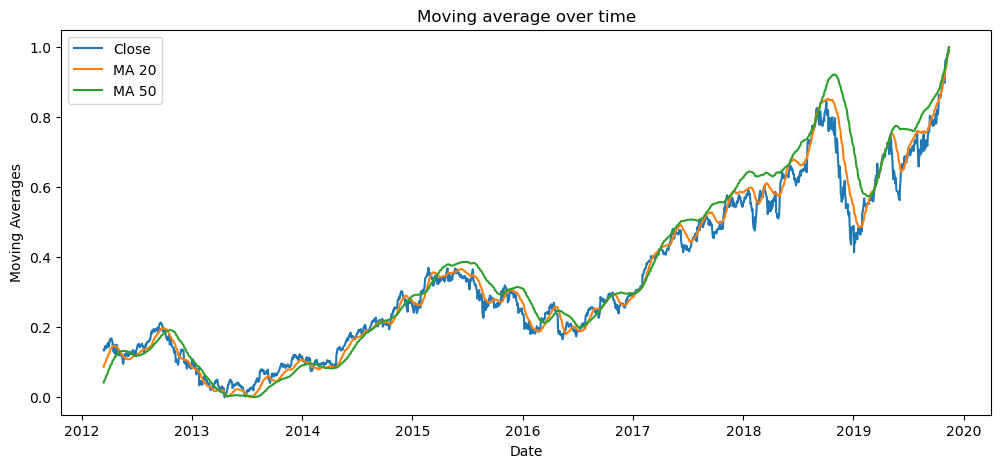

In [12]:
# Moving Averages Comparison
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_20'], label='MA 20')
plt.plot(df['Date'], df['MA_50'], label='MA 50')
plt.title('Moving average over time')
plt.ylabel("Moving Averages")
plt.xlabel("Date")
plt.legend()
plt.show()


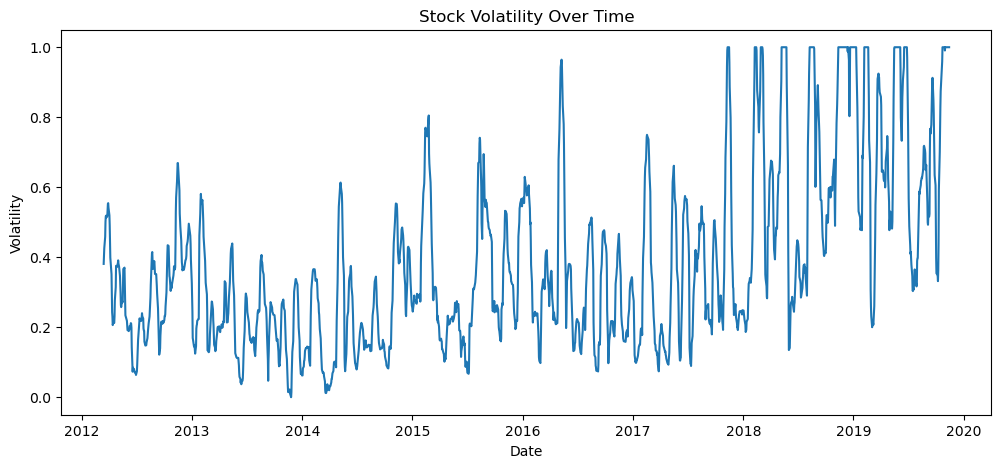

In [13]:
# Volatility visualization
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volatility_20'], label='20-Day Volatility')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Volatility Over Time")
plt.show()


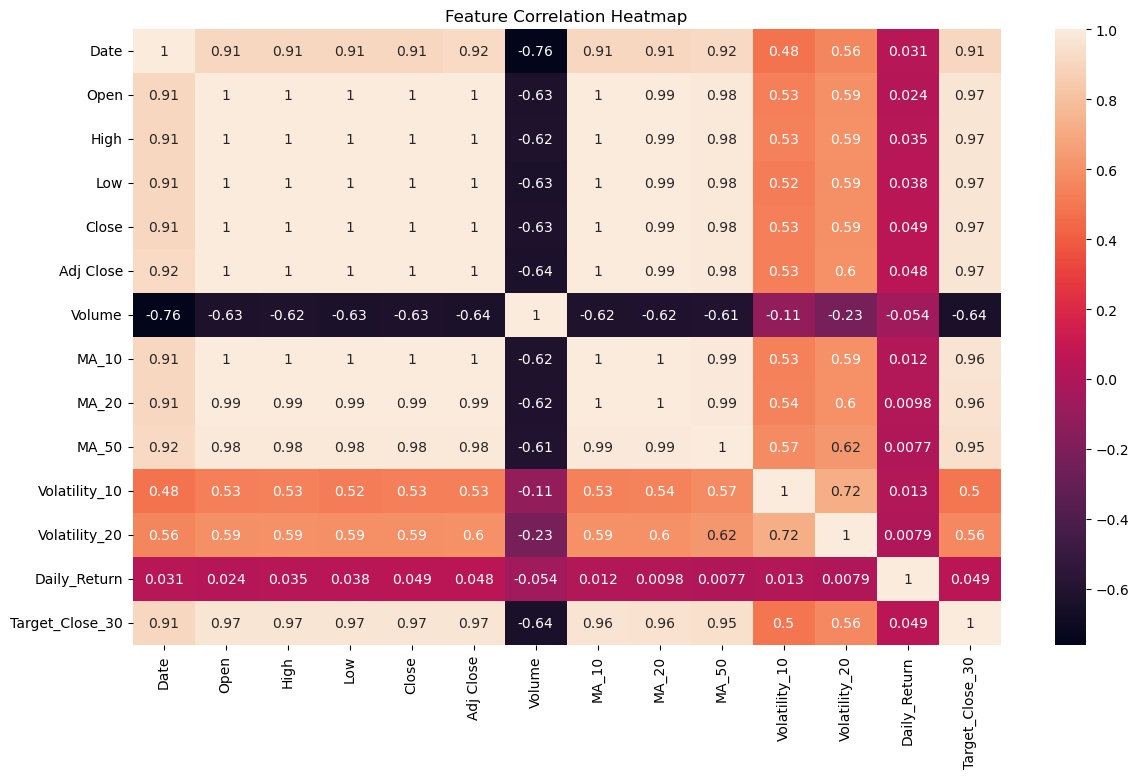

In [14]:
# Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()
